## Lab 07 by: Otávio Londero


1. Data Preparation and Exploration:
- Load the `movies.csv` and `reviews.csv` datasets into pandas dataframes.
- Display summary statistics and the first few rows of each dataframe to understand their structure.


In [68]:
import pandas as pd # import
import matplotlib.pyplot as plt

# load the datasets
movies = pd.read_csv('movies.csv')
reviews = pd.read_csv('reviews.csv')

In [2]:
movies.head(5)

,movie_id,title,genre,release_year
0,1,The Shawshank Redemption,Drama,1999
1,2,The Godfather,Drama,1987
2,3,The Dark Knight,Drama,1993
3,4,Schindler's List,Crime,2002
4,5,Pulp Fiction,Action,1980


In [3]:
reviews.head(5)

,review_id,movie_id,reviewer,rating,review_date
0,1,96,Jane Doe,8.0,2020-02-17
1,2,90,Victor Scott,1.8,2020-08-22
2,3,32,Yara Baker,1.8,2020-03-10
3,4,77,Victor Scott,5.2,2020-04-24
4,5,16,Mia Martinez,6.3,2020-04-13


In [4]:
movies.describe()

,movie_id,release_year
count,100.000000,100.000000
mean,50.500000,2001.670000
std,29.011492,13.758417
min,1.000000,1980.000000
25%,25.750000,1988.000000
50%,50.500000,2001.500000
75%,75.250000,2014.250000
max,100.000000,2023.000000


In [5]:
reviews.describe()

,review_id,movie_id,rating
count,300.000000,300.00000,300.000000
mean,150.500000,52.99000,5.328333
std,86.746758,27.98835,2.580354
min,1.000000,1.00000,1.000000
25%,75.750000,29.75000,3.000000
50%,150.500000,54.00000,5.200000
75%,225.250000,76.25000,7.400000
max,300.000000,100.00000,10.000000


2. Highest Rated Movies:
- Perform an inner join on the `movies` and `reviews` dataframes based on the `movie_id` column.
- Calculate the average rating for each movie.
- Identify the top 10 highest-rated movies.
- Display the titles and average ratings of these top 10 movies.


In [6]:
# example = pd.merge(left, right, how="inner", on=["key1", "key2"]) from: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merge
movies_reviews = pd.merge(movies, reviews, how='inner', on = 'movie_id')
movies_reviews.head(10) # Making sure everything is correct

,movie_id,title,genre,release_year,review_id,reviewer,rating,review_date
0,1,The Shawshank Redemption,Drama,1999,40,Ivy White,4.4,2020-04-04
1,1,The Shawshank Redemption,Drama,1999,151,Quinn Walker,7.7,2020-01-23
2,1,The Shawshank Redemption,Drama,1999,153,Sophia Allen,9.0,2020-01-27
3,1,The Shawshank Redemption,Drama,1999,167,Henry Harris,8.7,2020-06-17
4,3,The Dark Knight,Drama,1993,129,Uma King,9.8,2020-03-12
5,4,Schindler's List,Crime,2002,140,Yara Baker,7.1,2020-05-13
6,4,Schindler's List,Crime,2002,208,Olivia Clark,2.5,2020-05-09
7,6,The Lord of the Rings: The Return of the King,Crime,2010,20,Bob Brown,1.2,2020-02-08
8,6,The Lord of the Rings: The Return of the King,Crime,2010,41,Henry Harris,1.5,2020-10-17
9,6,The Lord of the Rings: The Return of the King,Crime,2010,46,Jane Doe,7.5,2020-07-31


In [7]:
# top 10 : https://stackoverflow.com/questions/43859416/finding-top-10-in-a-dataframe-in-pandas
# DataFrame.nlargest(n, columns, keep='first') : https://pandas.pydata.org/pandas-docs/version/0.23.0/generated/pandas.DataFrame.nlargest.html
movies_reviews.groupby('title')['rating'].mean().nlargest(10)

title
The Dark Knight            9.800
Vertigo                    9.350
City Lights                9.250
Jaws                       8.600
Grave of the Fireflies     8.000
Scarface                   8.000
The Empire Strikes Back    8.000
North by Northwest         7.650
A Beautiful Mind           7.625
Oldboy                     7.500
Name: rating, dtype: float64

In [8]:
# The transform() method allows you to execute a function for each value of the DataFrame: https://www.w3schools.com/python/pandas/ref_df_transform.asp
movies_reviews['movie_average_rating'] = movies_reviews.groupby('movie_id')['rating'].transform('mean') # I wanted to create a hole new role of average_rating for each movie
movies_reviews.head(10)

,movie_id,title,genre,release_year,review_id,reviewer,rating,review_date,movie_average_rating
0,1,The Shawshank Redemption,Drama,1999,40,Ivy White,4.4,2020-04-04,7.45
1,1,The Shawshank Redemption,Drama,1999,151,Quinn Walker,7.7,2020-01-23,7.45
2,1,The Shawshank Redemption,Drama,1999,153,Sophia Allen,9.0,2020-01-27,7.45
3,1,The Shawshank Redemption,Drama,1999,167,Henry Harris,8.7,2020-06-17,7.45
4,3,The Dark Knight,Drama,1993,129,Uma King,9.8,2020-03-12,9.80
5,4,Schindler's List,Crime,2002,140,Yara Baker,7.1,2020-05-13,4.80
6,4,Schindler's List,Crime,2002,208,Olivia Clark,2.5,2020-05-09,4.80
7,6,The Lord of the Rings: The Return of the King,Crime,2010,20,Bob Brown,1.2,2020-02-08,4.48
8,6,The Lord of the Rings: The Return of the King,Crime,2010,41,Henry Harris,1.5,2020-10-17,4.48
9,6,The Lord of the Rings: The Return of the King,Crime,2010,46,Jane Doe,7.5,2020-07-31,4.48


<Axes: title={'center': 'Top 10 Movies'}, xlabel='movie_average_rating', ylabel='Movies'>

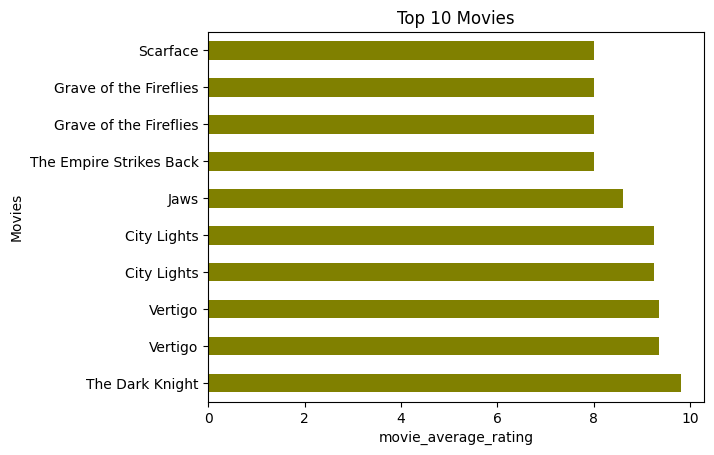

In [9]:
top_10_movies = movies_reviews.nlargest(10, 'movie_average_rating')
top_10_movies.plot(x='title', y='movie_average_rating', kind='barh', color='olive', title='Top 10 Movies', legend=False, ylabel='Movies', xlabel='movie_average_rating',)

3. Genre Analysis:
- Group the joined dataframe by `genre` and calculate the average rating for each genre.
- Determine which genre has the highest average rating.
- Display the genres along with their average ratings.


In [10]:
# Answer
movies_reviews.groupby('genre')['movie_average_rating'].mean().nlargest()

genre
Sci-Fi       6.118421
Fantasy      5.768421
Biography    5.279310
Drama        5.204478
Action       5.109375
Name: movie_average_rating, dtype: float64

<Axes: title={'center': 'Genre Rating'}, xlabel='Rating', ylabel='Genre'>

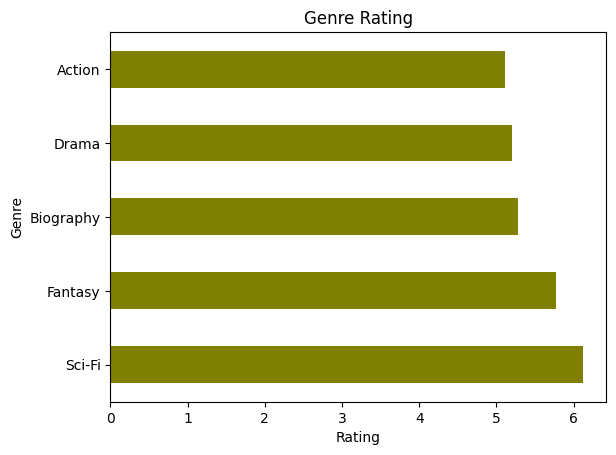

In [11]:
# Plot
movies_reviews.groupby('genre')['movie_average_rating'].mean().nlargest().plot(kind='barh', color='olive', xlabel='Rating', ylabel='Genre', legend=False, title='Genre Rating')

4. Reviewer Analysis:
- Identify the top 5 reviewers who have given the most reviews.
- Calculate the average rating given by each of these top 5 reviewers.
- Display the reviewer names and their average ratings.


In [12]:
movies_reviews.groupby('reviewer')['rating'].mean().nlargest(5) # 2

reviewer
Jane Doe         7.300000
Ryan Hall        7.030769
Grace Lee        6.266667
Charlie Davis    6.240000
Mia Martinez     6.183333
Name: rating, dtype: float64

In [13]:
# function value_counts() : https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
movies_reviews['reviewer'].value_counts().nlargest(5) # 1

reviewer
Tom Young       18
Uma King        16
Henry Harris    15
John Smith      14
Olivia Clark    13
Name: count, dtype: int64

In [14]:
movies_reviews.groupby('reviewer')['rating'].mean() # 3

reviewer
Alice Johnson     6.141667
Bob Brown         5.040000
Charlie Davis     6.240000
Emily Evans       4.410000
Frank Wilson      4.366667
Grace Lee         6.266667
Henry Harris      4.473333
Ivy White         4.669231
Jack Martin       4.608333
Jane Doe          7.300000
John Smith        4.542857
Kathy Thompson    4.981818
Liam Garcia       5.230769
Mia Martinez      6.183333
Noah Robinson     4.900000
Olivia Clark      6.023077
Paul Lewis        5.633333
Quinn Walker      5.640000
Ryan Hall         7.030769
Sophia Allen      5.087500
Tom Young         5.400000
Uma King          5.500000
Victor Scott      3.311111
Wendy Green       4.418182
Xander Adams      4.800000
Yara Baker        5.707692
Zane Carter       5.611111
Name: rating, dtype: float64

5. Time-Based Analysis:
- Analyze how movie ratings have changed over time.
- Group the joined dataframe by the month extracted from the `review_date`
- column and calculate the average rating for each month.
- Create a line plot showing the trend of average movie ratings over time.
- Discuss any observable trends.


In [15]:
# Transform `review_date` to a datetime format: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
movies_reviews["review_date"] = pd.to_datetime(movies_reviews["review_date"])
# Extract the year and month: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html
movies_reviews["year_month"] = movies_reviews["review_date"].dt.to_period("M")

<Axes: title={'center': 'Average Movie Ratings Over Month'}, xlabel='Year-Month', ylabel='Average Rating'>

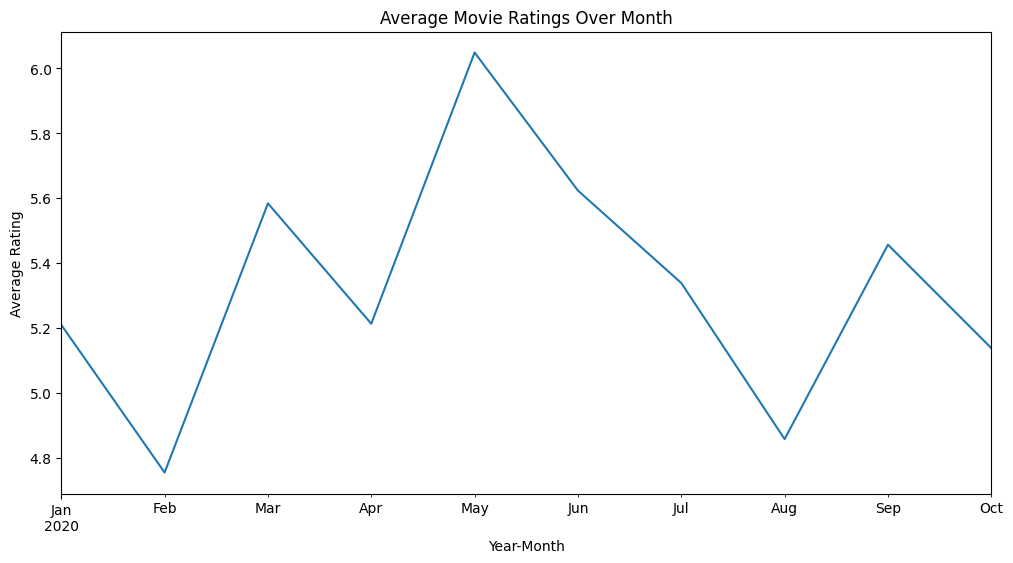

In [16]:
movies_reviews.groupby("year_month")["rating"].mean().plot(kind="line", figsize=(12, 6), ylabel="Average Rating", xlabel="Year-Month", title="Average Movie Ratings Over Month", ) # 4

The graph seems like a rollercoaster of ratings, where some months delivered hits, while others left reviewers unimpressed. Had a peak almost on the middle of the year, perhaps because of good movies releases.

In [17]:
movies_reviews["month_average_r"] = movies_reviews.groupby("year_month")["rating"].transform("mean")

6. Movies with Most Reviews:
- Identify the top 10 movies that have received the most reviews.
- Display the titles of these movies along with the number of reviews they have received.

In [18]:
movies_reviews.groupby('title')['reviewer'].count().nlargest(10)

title
Full Metal Jacket        7
Interstellar             7
Capernaum                6
It's a Wonderful Life    6
Memento                  6
Paths of Glory           6
Shutter Island           6
The Revenant             6
The Truman Show          6
Amélie                   5
Name: reviewer, dtype: int64

In [19]:
movies_reviews['title'].value_counts().nlargest(20)

title
Interstellar                                     7
Full Metal Jacket                                7
Shutter Island                                   6
It's a Wonderful Life                            6
Memento                                          6
Paths of Glory                                   6
Capernaum                                        6
The Revenant                                     6
The Truman Show                                  6
The Dark Knight Rises                            5
Hara-Kiri                                        5
The Lord of the Rings: The Return of the King    5
Eternal Sunshine of the Spotless Mind            5
Toy Story                                        5
The Lives of Others                              5
The Hunt                                         5
Amélie                                           5
Psycho                                           4
Your Name                                        4
The Great Dictator       

7. Distribution of Ratings:
- Create a histogram to visualize the distribution of ratings.
- Analyze the distribution and discuss any skewness or patterns observed in the ratings.


<Axes: title={'center': 'Distribution of Movie Ratings'}, ylabel='Frequency'>

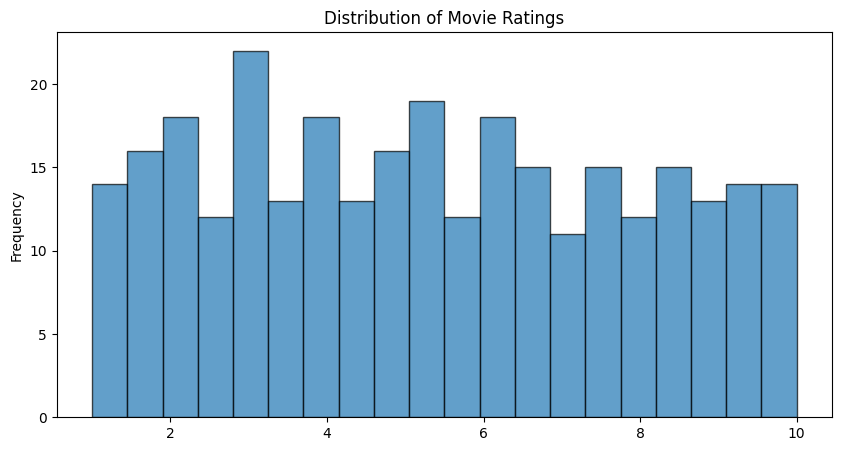

In [20]:
movies_reviews["rating"].plot(kind="hist", bins=20, alpha=0.7, edgecolor="black", figsize=(10, 5), title="Distribution of Movie Ratings")

It's possible to see a growth in the first three months of the year, after that, started a rollercoaster of ratings with a stabilization in the end of the year.

8. Impact of Release Year:
- Analyze if there is any correlation between the release year of a movie and its average rating.
- Create a scatter plot showing the relationship between the release year and the average rating.
- Discuss any observable patterns or correlations.


In [21]:
movies_reviews.columns

Index(['movie_id', 'title', 'genre', 'release_year', 'review_id', 'reviewer',
       'rating', 'review_date', 'movie_average_rating', 'year_month',
       'month_average_r'],
      dtype='object')

<Axes: xlabel='Release Year', ylabel='Movie Average Rating'>

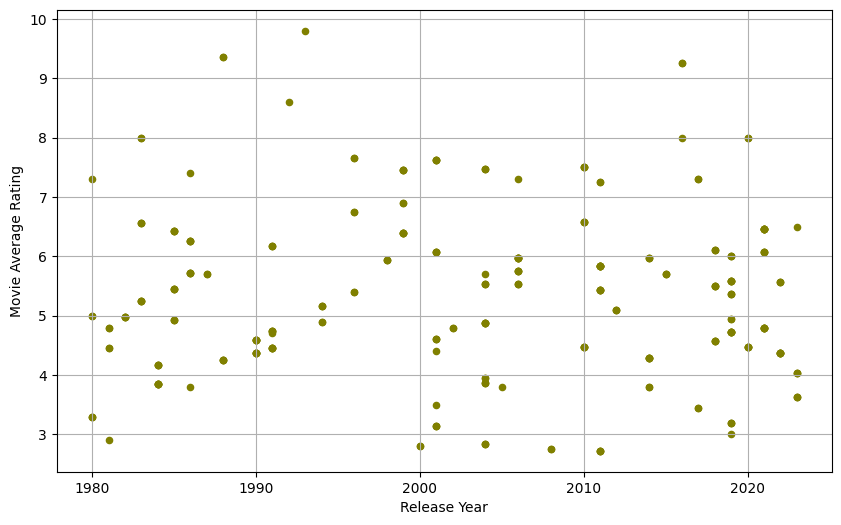

In [32]:
movies_reviews.plot.scatter(x='release_year', y='movie_average_rating', figsize=(10, 6), grid=True, xlabel = 'Release Year', ylabel = 'Movie Average Rating', color='olive')

There's a high rating until the 20s, after that, a good amount of lower ratings. Started to grow again after 2015.

9. Reviewer Consistency:
- For each reviewer, calculate the standard deviation of their ratings.
- Identify the most and least consistent reviewers based on the standard deviation of their ratings.
- Display the names of these reviewers along with their standard deviations.


In [53]:
standard_deviation = movies_reviews.groupby('reviewer')['rating'].std()
most_consistent = standard_deviation.idxmin()
least_consistent = standard_deviation.idxmax()
print(f"The most consistent reviewer is {most_consistent}, deviation: {standard_deviation.min():.2f}")
print(f"The least consistent reviewer is {least_consistent}, deviation:  {standard_deviation.max():.2f}")
standard_deviation

The most consistent reviewer is Noah Robinson, deviation: 1.77
The least consistent reviewer is Zane Carter, deviation:  3.57


reviewer
Alice Johnson     3.293094
Bob Brown         2.961681
Charlie Davis     2.205145
Emily Evans       2.277645
Frank Wilson      2.596618
Grace Lee         2.192273
Henry Harris      2.610273
Ivy White         1.875449
Jack Martin       2.849389
Jane Doe          2.718823
John Smith        2.127373
Kathy Thompson    2.426857
Liam Garcia       2.314586
Mia Martinez      2.092773
Noah Robinson     1.773415
Olivia Clark      2.438290
Paul Lewis        1.913984
Quinn Walker      2.323360
Ryan Hall         2.221255
Sophia Allen      2.719473
Tom Young         2.556652
Uma King          2.742748
Victor Scott      1.940003
Wendy Green       2.708807
Xander Adams      2.214598
Yara Baker        3.128221
Zane Carter       3.567718
Name: rating, dtype: float64

10. Challenge Task - Genre Popularity Over Time:
- Analyze how the popularity of different genres has changed over time.
- Group the joined dataframe by `genre` and the year extracted from the `review_date` column.
- Calculate the number of reviews for each genre per month.
- Create a line plot for each genre showing the number of reviews over time.
- Discuss any trends or shifts in genre popularity over time

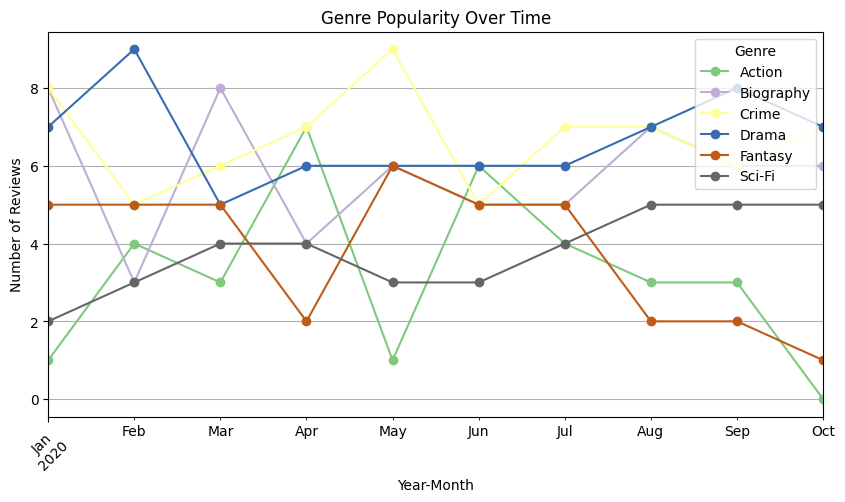

In [87]:
genre_counts = movies_reviews.groupby(["year_month", "genre"]).size().unstack(fill_value=0)

genre_counts.plot(kind="line", figsize=(10, 5), marker="o", colormap = 'Accent')

plt.title("Genre Popularity Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")
plt.legend(title="Genre", loc="upper right", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

Action and Fantasy, start strong but gradually fade, while others, like Sci-Fi and Drama, gain momentum as the months go by. Crime and Biography genres have their ups and downs, showing that audience interest constantly shifts.